## 线性回归代码实验

In [1]:
# %matplotlib inline
import random
import torch
from d2l import torch as d2l
import matplotlib as mpl
import matplotlib.pyplot as plt

def synthetic_data(w, b ,num):
    x =torch.normal(0 , 1 , (num , len(w))) # 生成num个样本，每个样本len(w)维
    y = torch.matmul(x, w) + b      # matmul函数作用： # 矩阵乘法
    # 添加噪声
    y += torch.normal(0 , 0.01 , y.shape)
    return x, y.reshape((-1, 1))


In [2]:
true_w = torch.tensor([2 , -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

观察一下feature的信息

In [4]:
print("featrue size : {}".format(features.shape))
# 打印第一个特征看看数据
print("First Featrue: {}, lable : {}".format(features[0], labels[0]))

featrue size : torch.Size([1000, 2])
First Featrue: tensor([ 0.0167, -0.0118]), lable : tensor([4.2594])


绘图看一下数据点分布位置，可以看到很好的线性关系

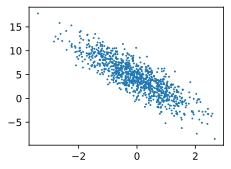

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

定义一个函数，打乱数据集中的样本并以小批量的形式获取数据：

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0768,  0.7864],
        [ 0.1960,  1.3246],
        [ 0.4103, -1.2385],
        [ 0.0186,  0.3655],
        [ 0.7820,  0.2182],
        [-0.2246, -0.4569],
        [-0.6919,  0.8800],
        [ 0.0856,  0.4114],
        [-0.2806, -0.6253],
        [-0.2926, -1.7274]]) 
 tensor([[ 3.6612],
        [ 0.1000],
        [ 9.2284],
        [ 3.0011],
        [ 5.0086],
        [ 5.3244],
        [-0.1536],
        [ 2.9624],
        [ 5.7719],
        [ 9.4750]])


In [16]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

定义模型、损失函数与优化算法

In [11]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

正式训练开始，可以尝试调节学习率参数来感受学习效果：

In [17]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.035988
epoch 2, loss 0.000135
epoch 3, loss 0.000050
epoch 4, loss 0.000050
epoch 5, loss 0.000050
w的估计误差: tensor([-0.0001, -0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([7.3910e-05], grad_fn=<RsubBackward1>)


## Softmax实践（图像分类数据集）